# Example: Automated feature scaling
------------------------------------

This example shows how ATOM handles models that require automated feature scaling.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [2]:
# Load the data
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [3]:
atom = ATOMClassifier(X, y, verbose=2, random_state=1)

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (569, 31)
Train set size: 456
Test set size: 113
-------------------------------------
Memory: 141.24 kB
Scaled: False
Outlier values: 167 (1.2%)



In [4]:
# Check which models require feature scaling
atom.available_models(needs_scaling=True)

,acronym,fullname,estimator,module,handles_missing,needs_scaling,accepts_sparse,native_multilabel,native_multioutput,validation,supports_engines
0,CatB,CatBoost,CatBoostClassifier,catboost.core,True,True,True,False,False,n_estimators,catboost
1,KNN,KNearestNeighbors,KNeighborsClassifier,sklearn.neighbors._classification,False,True,True,True,True,None,"sklearn, sklearnex, cuml"
2,LGB,LightGBM,LGBMClassifier,lightgbm.sklearn,True,True,True,False,False,n_estimators,lightgbm
3,lSVM,LinearSVM,LinearSVC,sklearn.svm._classes,False,True,True,False,False,None,"sklearn, cuml"
4,LR,LogisticRegression,LogisticRegression,sklearn.linear_model._logistic,False,True,True,False,False,None,"sklearn, sklearnex, cuml"
5,MLP,MultiLayerPerceptron,MLPClassifier,sklearn.neural_network._multilayer_perceptron,False,True,True,True,False,max_iter,sklearn
6,PA,PassiveAggressive,PassiveAggressiveClassifier,sklearn.linear_model._passive_aggressive,False,True,True,False,False,max_iter,sklearn
7,Perc,Perceptron,Perceptron,sklearn.linear_model._perceptron,False,True,False,False,False,max_iter,sklearn
8,RNN,RadiusNearestNeighbors,RadiusNeighborsClassifier,sklearn.neighbors._classification,False,True,True,True,True,None,sklearn
9,Ridge,Ridge,RidgeClassifier,sklearn.linear_model._ridge,False,True,True,True,False,None,"sklearn, sklearnex, cuml"


In [5]:
# We fit two models: LR needs scaling and Bag doesn't
atom.run(["LR", "Bag"])


Training ========================= >>
Models: LR, Bag
Metric: f1


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation --> f1: 0.9913
Test evaluation --> f1: 0.9861
Time elapsed: 0.120s
-------------------------------------------------
Time: 0.120s


Results for Bagging:
Fit ---------------------------------------------
Train evaluation --> f1: 0.9982
Test evaluation --> f1: 0.9444
Time elapsed: 0.067s
-------------------------------------------------
Time: 0.067s


Final results ==================== >>
Total time: 0.194s
-------------------------------------
LogisticRegression --> f1: 0.9861 !
Bagging            --> f1: 0.9444


In [6]:
# Now, we create a new branch and scale the features before fitting the model
atom.branch = "scaling"

Successfully created new branch: scaling.


In [7]:
atom.scale()

Fitting Scaler...
Scaling features...


In [8]:
atom.run("LR_2")


Training ========================= >>
Models: LR_2
Metric: f1


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation --> f1: 0.9913
Test evaluation --> f1: 0.9861
Time elapsed: 0.032s
-------------------------------------------------
Time: 0.032s


Final results ==================== >>
Total time: 0.035s
-------------------------------------
LogisticRegression --> f1: 0.9861


## Analyze the results

In [9]:
# Let's compare the differences between the models
print(atom.lr.scaler)
print(atom.bag.scaler)
print(atom.lr_2.scaler)

Scaler()
None
None


In [10]:
# And the data they use is different
print(atom.lr.X.iloc[:5, :3])
print("-----------------------------")
print(atom.bag.X.iloc[:5, :3])
print("-----------------------------")
print(atom.lr_2.X_train.equals(atom.lr.X_train))

         x0        x1        x2
0 -0.181875  0.356669 -0.147122
1  1.162216  0.300578  1.159704
2  1.056470  1.212060  0.933833
3  0.277287  2.457753  0.188054
4 -1.442482 -0.825921 -1.343434
-----------------------------
      x0     x1      x2
0  13.48  20.82   88.40
1  18.31  20.58  120.80
2  17.93  24.48  115.20
3  15.13  29.81   96.71
4   8.95  15.76   58.74
-----------------------------
True


In [11]:
# Note that the scaler is included in the model's pipeline
print(atom.lr.pipeline)
print("-----------------------------")
print(atom.bag.pipeline)
print("-----------------------------")
print(atom.lr_2.pipeline)

Pipeline(memory=Memory(location=None),
         ('steps', [('AutomatedScaler', Scaler())]),
         verbose=False)
-----------------------------
Pipeline(memory=Memory(location=None), steps=[], verbose=False)
-----------------------------
Pipeline(memory=Memory(location=None),
         ('steps', [('scaler', Scaler(verbose=2))]),
         verbose=False)


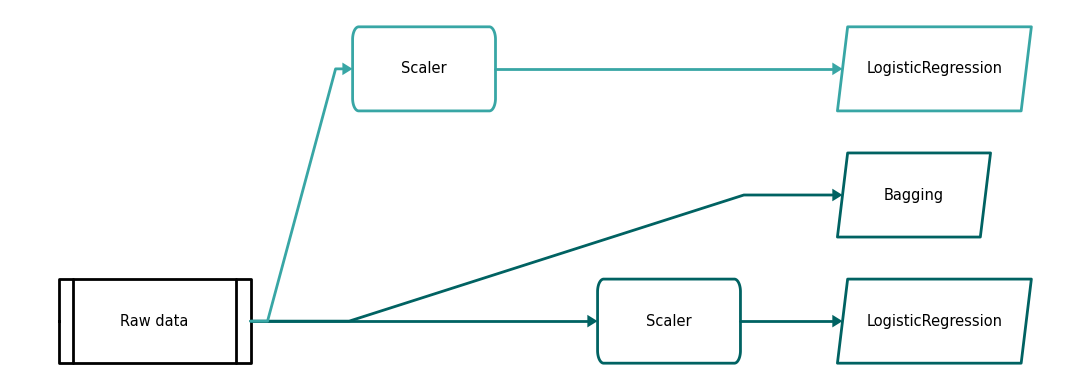

In [12]:
atom.plot_pipeline()